In [1]:
import csv,sys,os
import argparse
from math import sqrt
from pprint import pprint
import numpy as np
import fitsio
import matplotlib.pyplot as plt
from pandas import DataFrame
import pdb
import pylab as py
from matplotlib import gridspec
from dither_plot import *

original assignment is: /data/tiles/ALL_tiles/20191119/fiberassign-063077.fits
Dithered assignment is: /data/tiles/ALL_tiles/20191119/fiberassign-063078.fits
if these are not the correct files to be used, stop now!
None of the fibers in qa-00033895.fits have landed on a source (snr >0.5) in petal 0
None of the fibers in qa-00033895.fits have landed on a source (snr >0.5) in petal 2


/n/home/desiobserver/Notebooks/dithertest/dither_plot_default.py:195: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if ((df[df['snr']>snr_thresh].size >0) & (df[df['snr']>snr_thresh][df['r']<225].size >0)) :


None of the fibers in qa-00033895.fits have landed on a source (snr >0.5) in petal 3
None of the fibers in qa-00033895.fits have landed on a source (snr >0.5) in petal 4


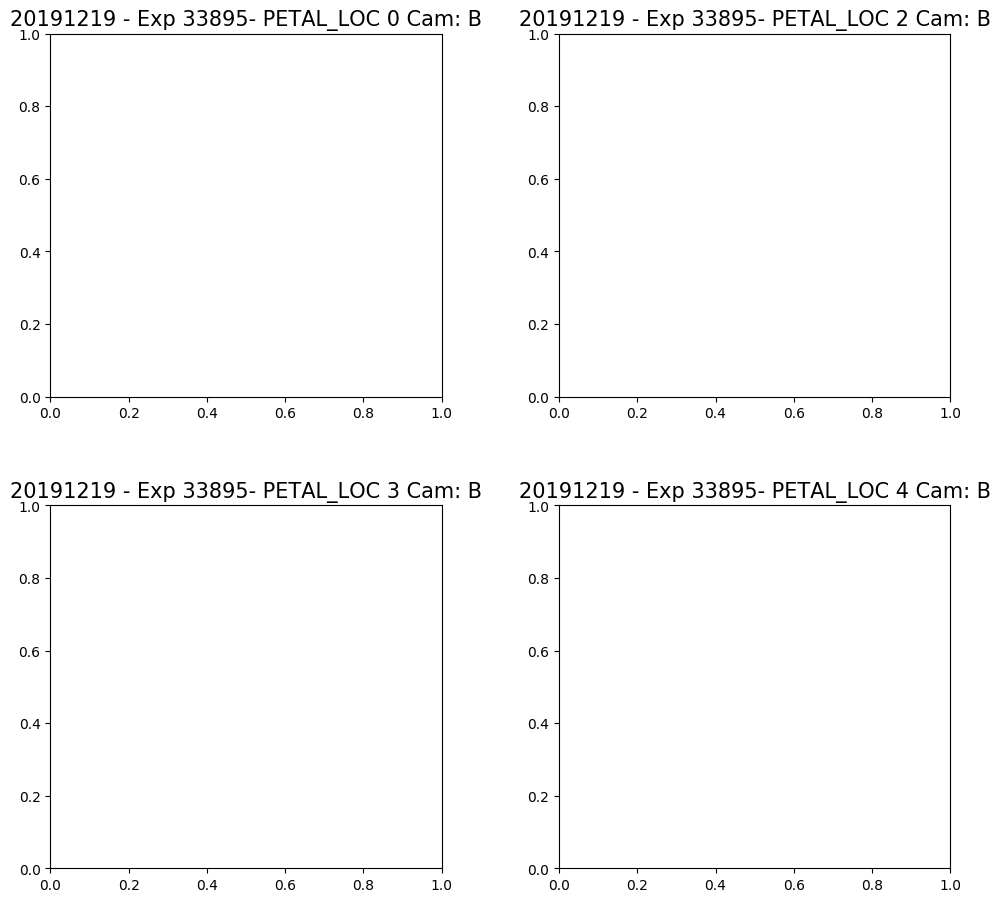

_________________________________________________________________________________

None of the fibers in qa-00033897.fits have landed on a source (snr >0.5) in petal 2


/n/home/desiobserver/Notebooks/dithertest/dither_plot_default.py:203: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['snr']>snr_thresh][df['r']<225].plot(kind='scatter', x='dra', y='ddec', color='red', ax=ax)


None of the fibers in qa-00033897.fits have landed on a source (snr >0.5) in petal 3


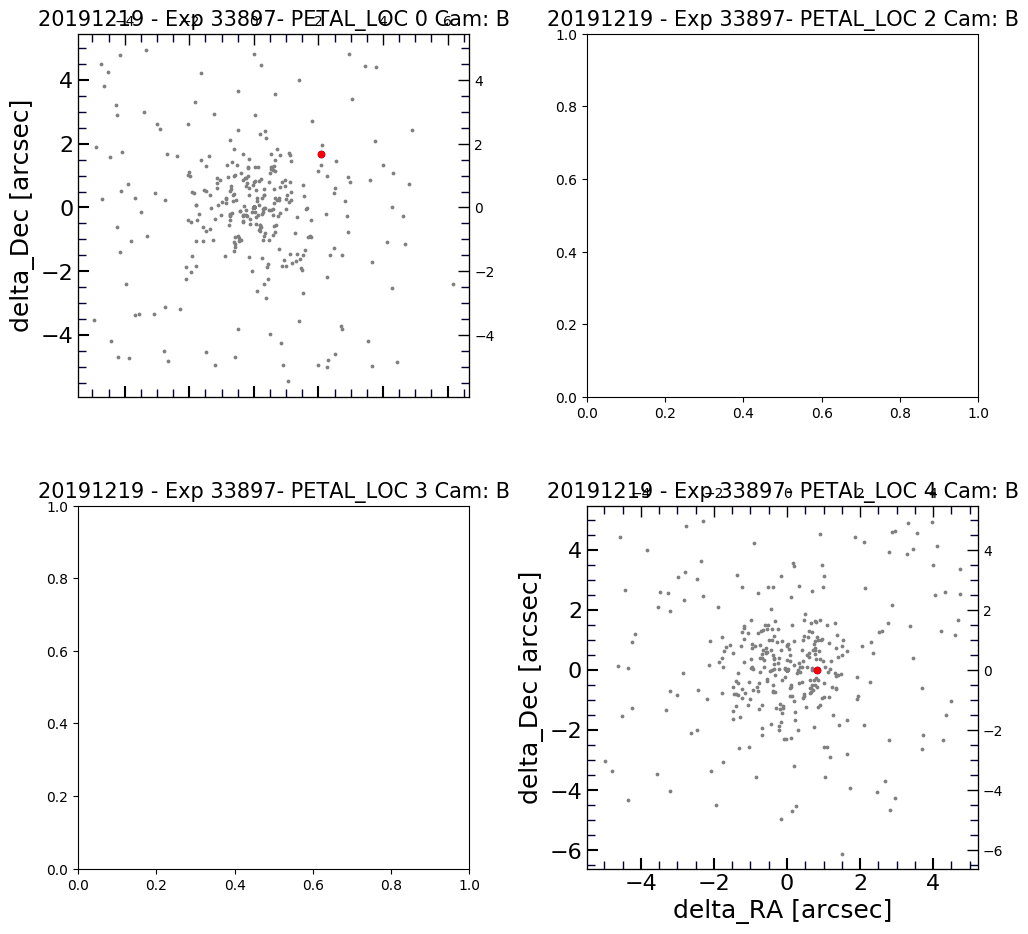

_________________________________________________________________________________

None of the fibers in qa-00033899.fits have landed on a source (snr >0.5) in petal 0
None of the fibers in qa-00033899.fits have landed on a source (snr >0.5) in petal 2
None of the fibers in qa-00033899.fits have landed on a source (snr >0.5) in petal 3
None of the fibers in qa-00033899.fits have landed on a source (snr >0.5) in petal 4


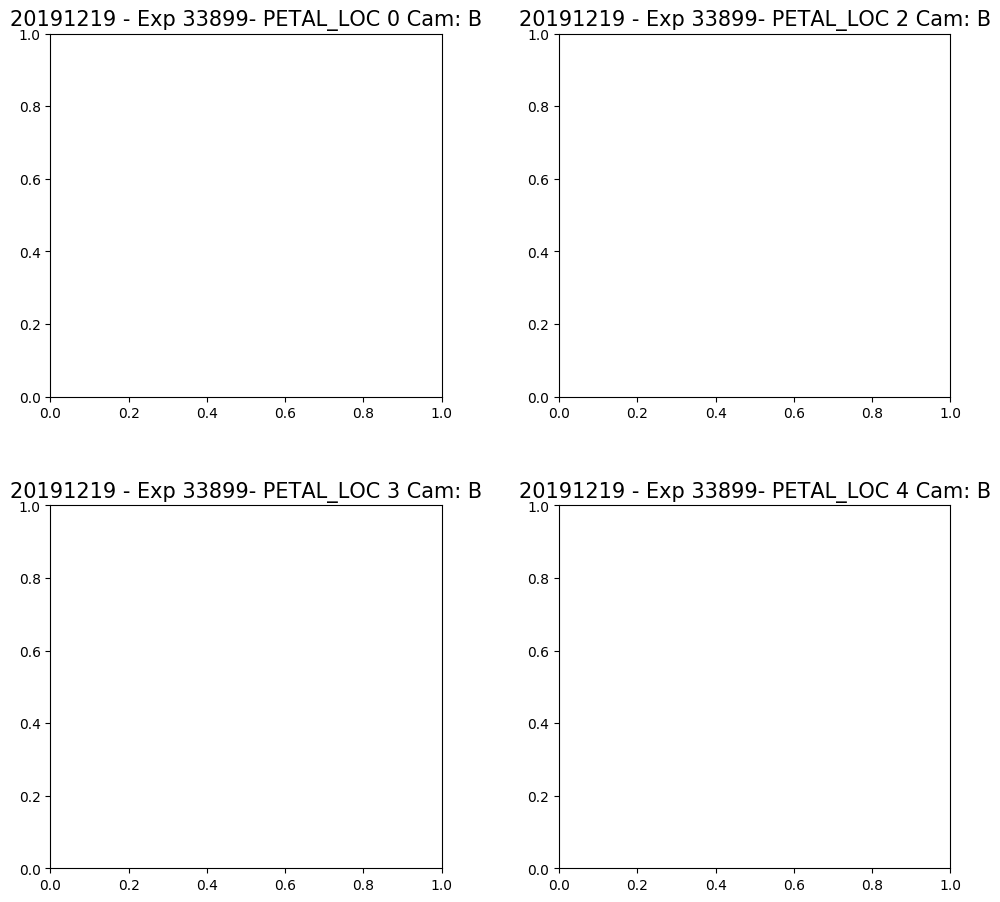

_________________________________________________________________________________

None of the fibers in qa-00033901.fits have landed on a source (snr >0.5) in petal 0
None of the fibers in qa-00033901.fits have landed on a source (snr >0.5) in petal 3


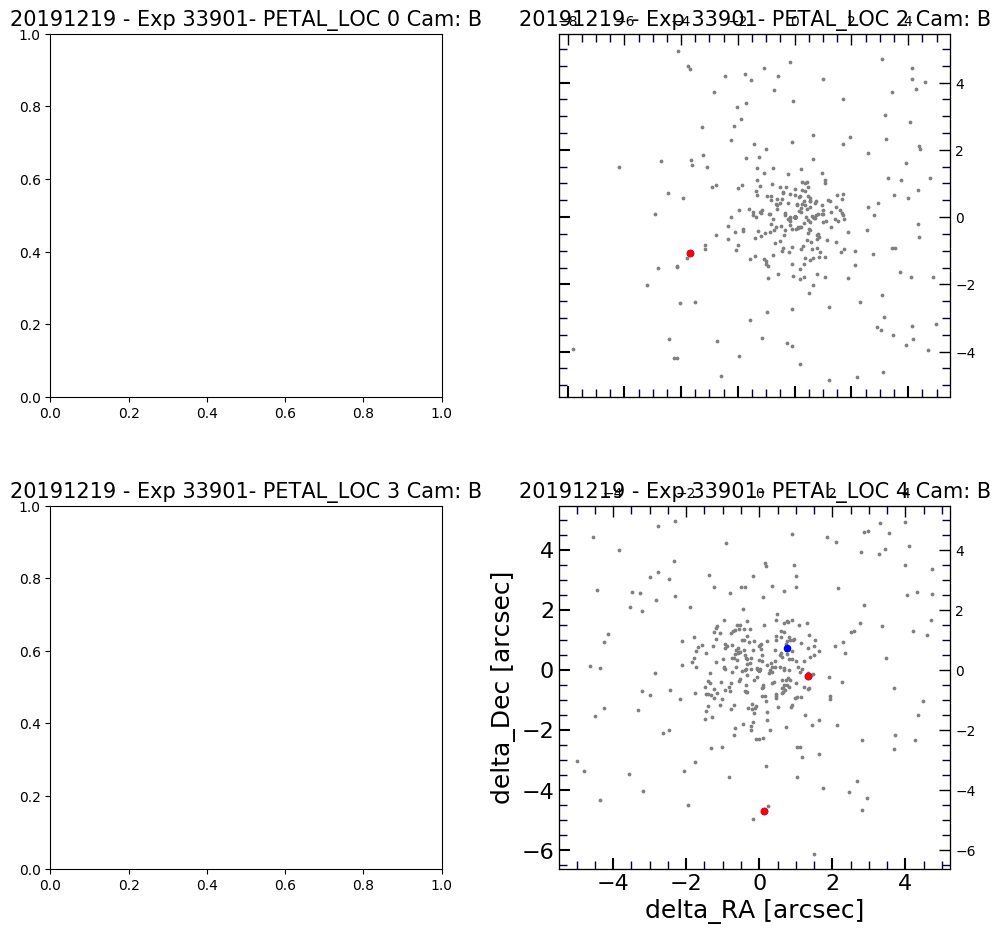

_________________________________________________________________________________

None of the fibers in qa-00033903.fits have landed on a source (snr >0.5) in petal 2
None of the fibers in qa-00033903.fits have landed on a source (snr >0.5) in petal 3
None of the fibers in qa-00033903.fits have landed on a source (snr >0.5) in petal 4


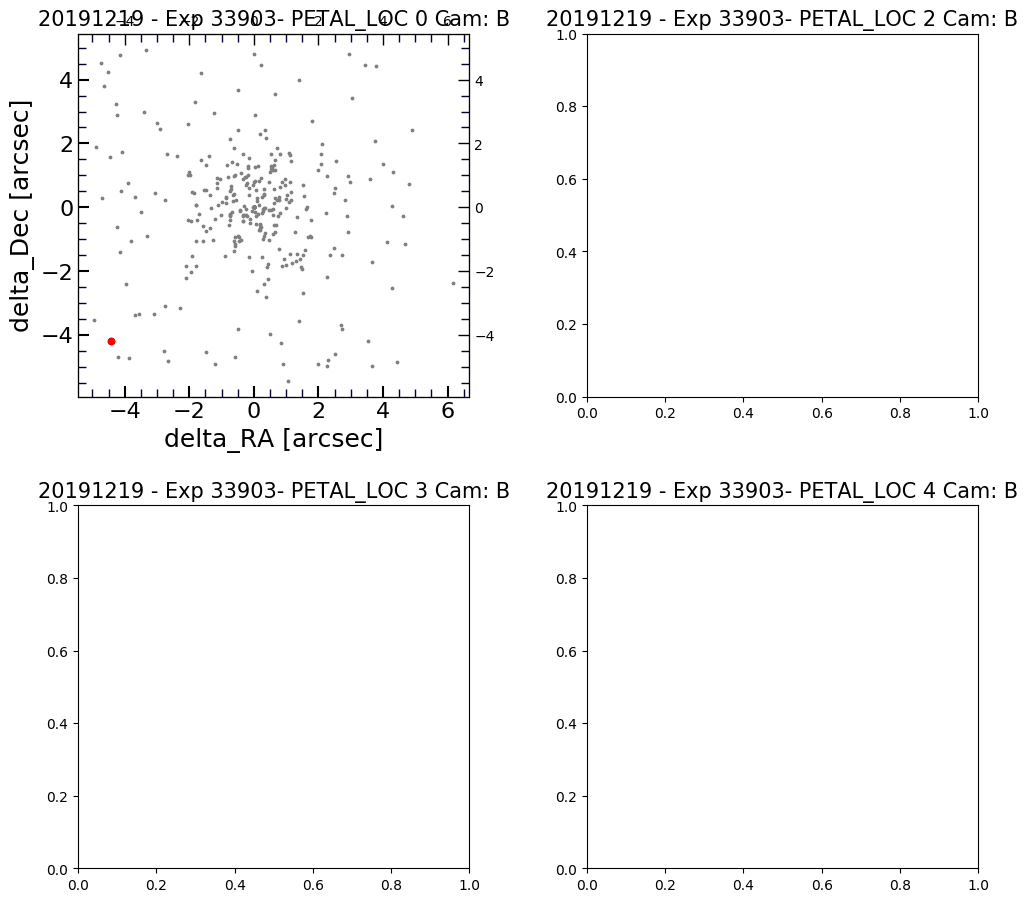

_________________________________________________________________________________

None of the fibers in qa-00033905.fits have landed on a source (snr >0.5) in petal 0
None of the fibers in qa-00033905.fits have landed on a source (snr >0.5) in petal 3
None of the fibers in qa-00033905.fits have landed on a source (snr >0.5) in petal 4


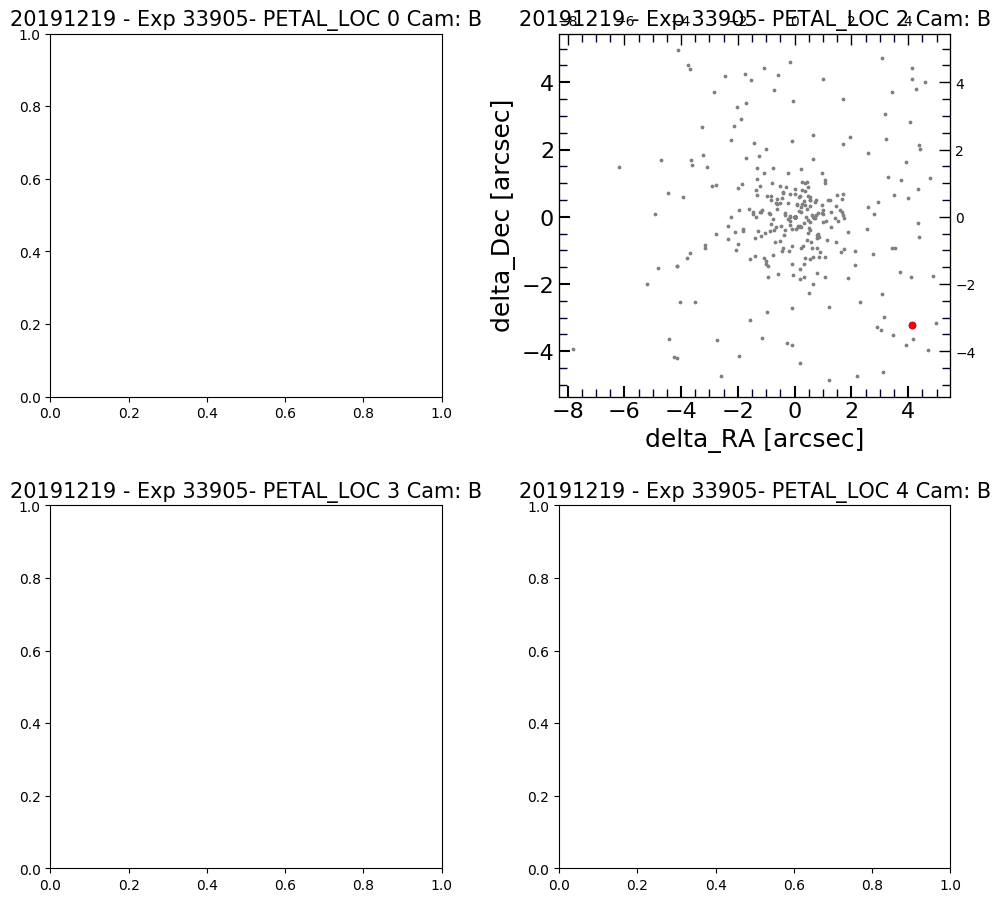

_________________________________________________________________________________

None of the fibers in qa-00033907.fits have landed on a source (snr >0.5) in petal 0
None of the fibers in qa-00033907.fits have landed on a source (snr >0.5) in petal 2
None of the fibers in qa-00033907.fits have landed on a source (snr >0.5) in petal 3


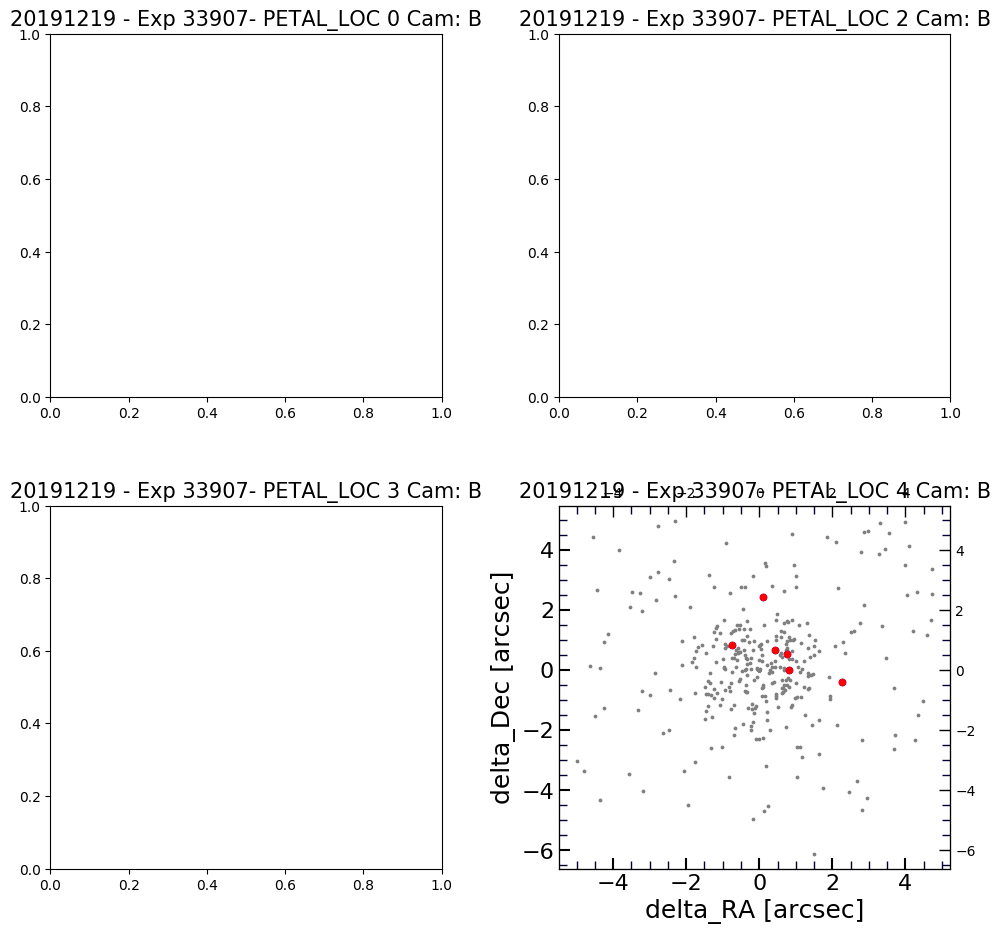

_________________________________________________________________________________

None of the fibers in qa-00033909.fits have landed on a source (snr >0.5) in petal 0
None of the fibers in qa-00033909.fits have landed on a source (snr >0.5) in petal 2
None of the fibers in qa-00033909.fits have landed on a source (snr >0.5) in petal 3


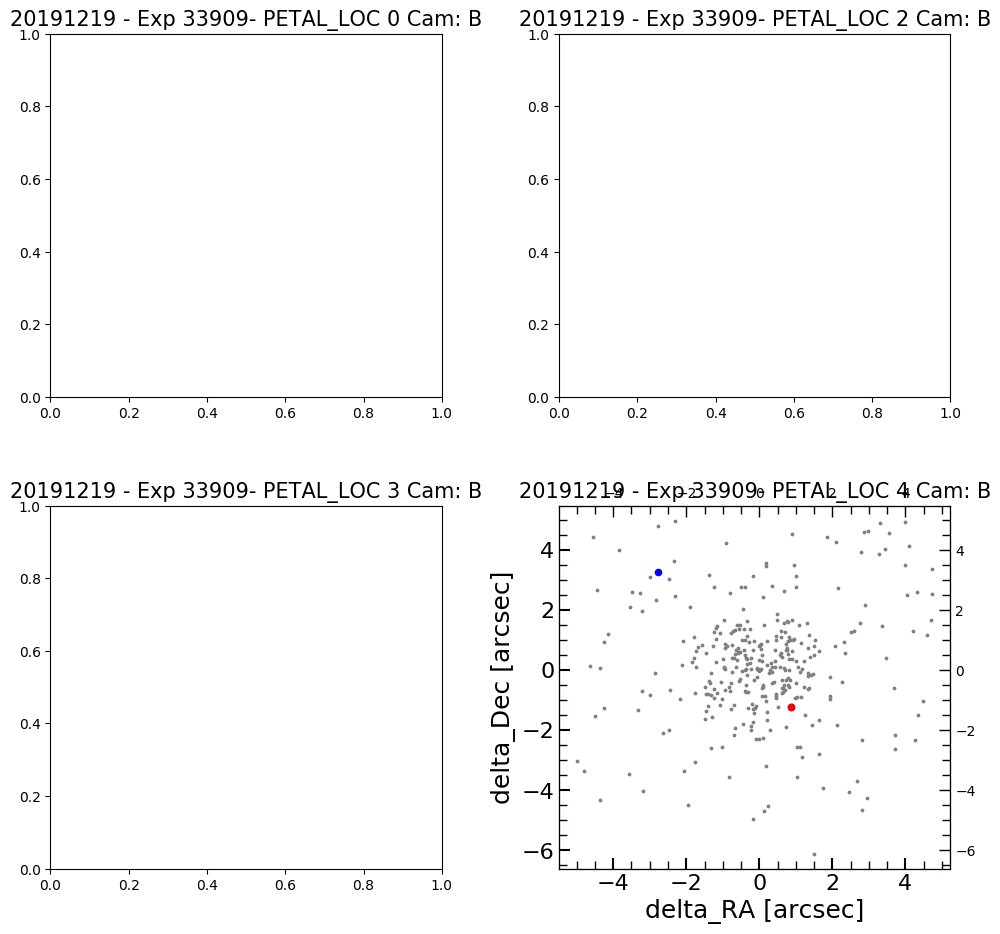

_________________________________________________________________________________

None of the fibers in qa-00033911.fits have landed on a source (snr >0.5) in petal 0
None of the fibers in qa-00033911.fits have landed on a source (snr >0.5) in petal 2
None of the fibers in qa-00033911.fits have landed on a source (snr >0.5) in petal 3


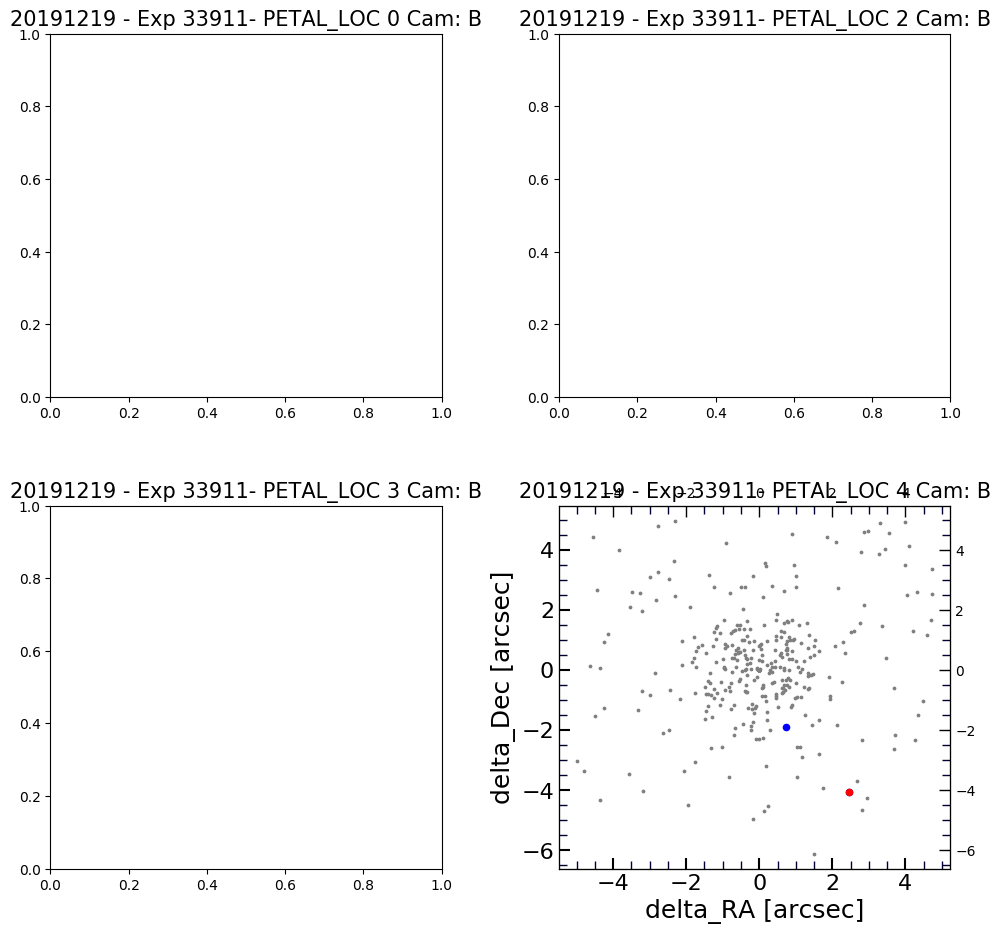

_________________________________________________________________________________

None of the fibers in qa-00033913.fits have landed on a source (snr >0.5) in petal 0
None of the fibers in qa-00033913.fits have landed on a source (snr >0.5) in petal 2
None of the fibers in qa-00033913.fits have landed on a source (snr >0.5) in petal 3


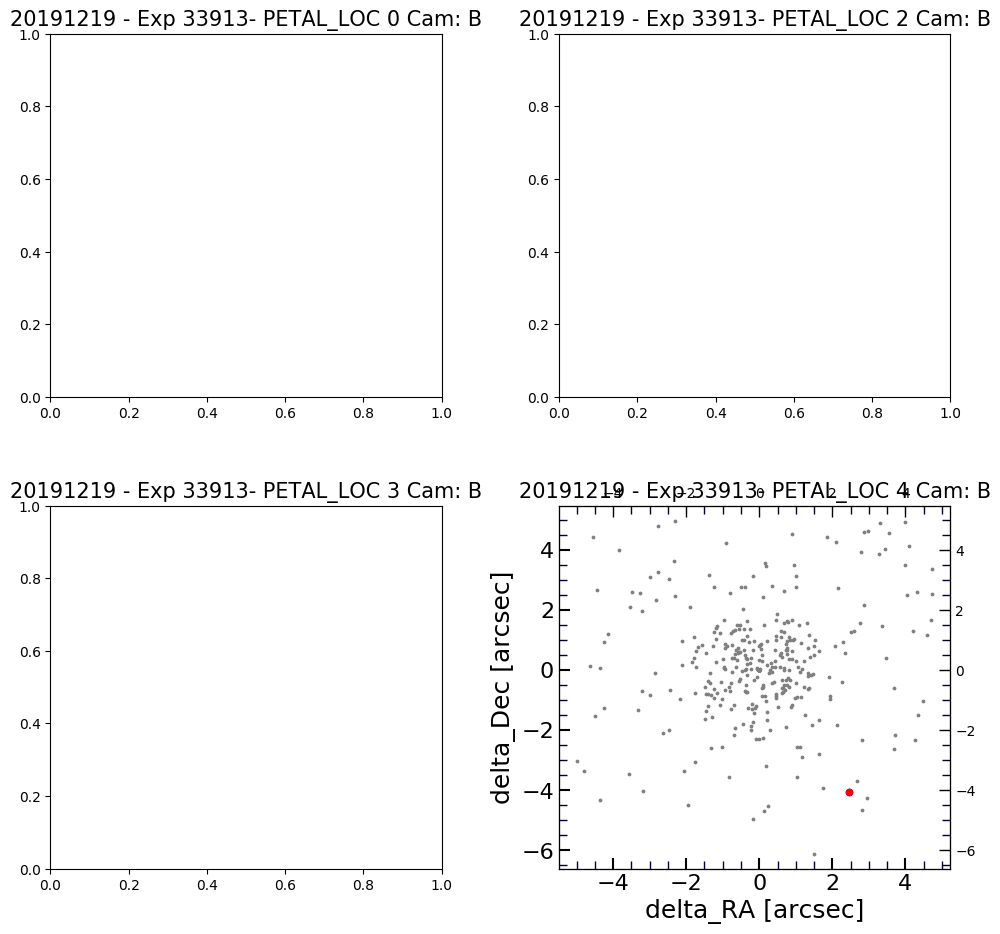

_________________________________________________________________________________

None of the fibers in qa-00033915.fits have landed on a source (snr >0.5) in petal 0
None of the fibers in qa-00033915.fits have landed on a source (snr >0.5) in petal 2
None of the fibers in qa-00033915.fits have landed on a source (snr >0.5) in petal 3
None of the fibers in qa-00033915.fits have landed on a source (snr >0.5) in petal 4


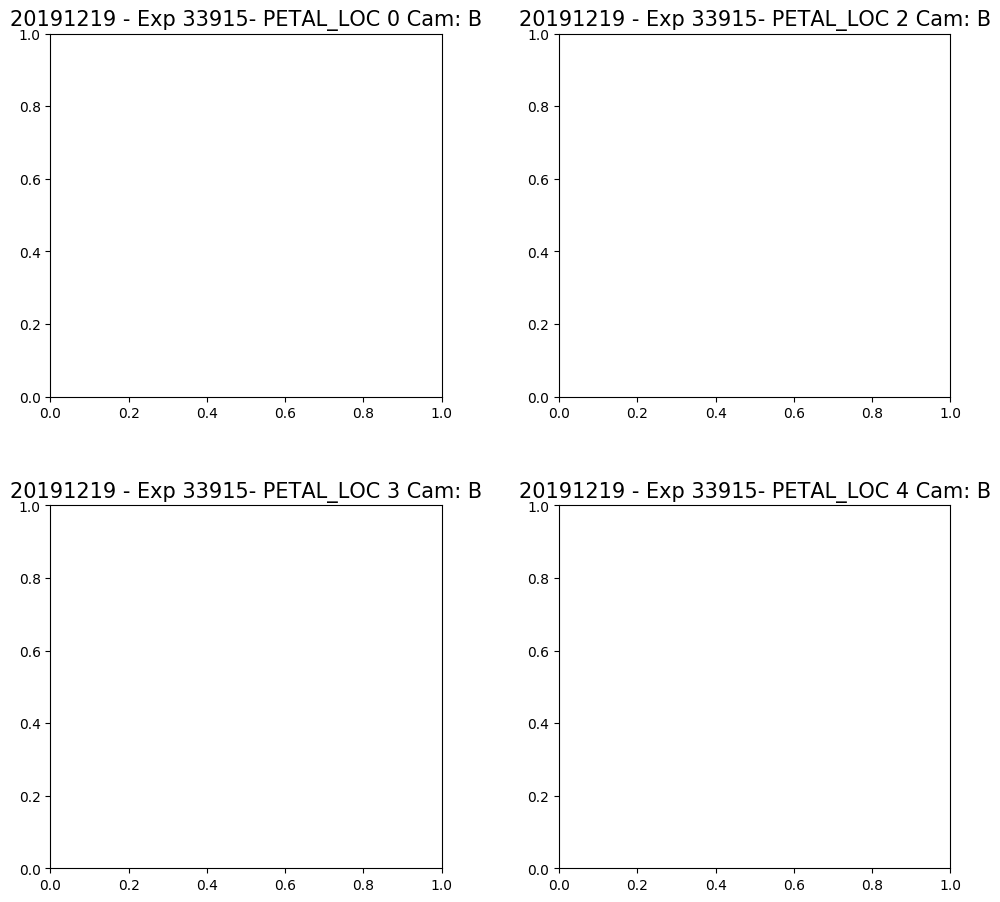

_________________________________________________________________________________



In [2]:
### plot_dither_seq() in dither_plot.py does not use csv file. It uses the raw fiberassign output

tileid,obsday,petalnum_list,channel = 63078,'20191219', [0, 2, 3, 4], 'B' 
nightwatch_dir='/exposures/nightwatch/'
fiberassign_dir = '/data/tiles/ALL_tiles/20191119/'
plotout_dir = './'
snr_thresh=0.5
seqlist = np.arange(33895, 33916, 2)

plot_dither_seq(seqlist, obsday, petalnum_list, channel, tileid, nightwatch_dir, \
                fiberassign_dir, plotout_dir, snr_thresh)

gfaseqlist is a set of GFA exposures matched to the spectrograph exposures in seqlist (possibly the same seqlist as you specified above)<br>
refexpidx is the index of the gfa exposure in gfaseqlist that is at the starting position of the dither sequence. deltara,deltadec are computed relative to the RA,Dec (TARGETRA,TARGETDEC) of the telescope pointing during exposure <br>
I believe the deltas relative to the reference exposure will be correct even if we are moving the ADCs for the acquisition as long as we don't change it during the dither script

### Script to calculate $\Delta$ RA and $\Delta$ Dec

In [3]:
from astropy.io import fits

def get_dra_ddec_from_exp(obsday, expidlist, unditheredidx, \
    nightwatch_dir = '/exposures/nightwatch/'):
    
    """Returns the delta RA and delta Dec 
    given a reference fits file and a seq
    of dithered fits files. All of these 
    files are assumed to be in 
    nightwatch_dir.
    
    Parameters
    ----------
    obsday : str
        observation date in yyyymmdd format
    expidlist : list
        list of exposure IDs; contains both
        dithered and undithered frames
    unditheredidx : integer
        location of the undithered exposure
        in expidlist
    nightwatch_dir : str
        Location of the directory
        
    Returns:
        printed values of delta RA and delta Dec
    """
    
    reffilename = nightwatch_dir + obsday + '/000'+\
        str(expidlist[unditheredidx])+'/qa-000'+\
        str(expidlist[unditheredidx])+'.fits'
    
    refhdu1 = fits.open(reffilename)
    refra = refhdu1['PRIMARY'].header['TARGTRA']
    refdec = refhdu1['PRIMARY'].header['TARGTDEC']
    
    for idx in range(len(expidlist)):
        fname = nightwatch_dir + obsday + '/000'+\
            str(expidlist[idx])+'/qa-000'+\
            str(expidlist[idx])+'.fits'
        hdu1 = fits.open(fname)
        raval = hdu1['PRIMARY'].header['TARGTRA']
        decval = hdu1['PRIMARY'].header['TARGTDEC']
        dra = (raval - refra)*3600 #convert to arcsec
        ddec = (decval - refdec)*3600
        print(f'Dithered expid {expidlist[idx]} deltaRA {dra} deltaDec {ddec}')

In [4]:
get_dra_ddec_from_exp(obsday = '20191219', expidlist=seqlist, unditheredidx=0)

Dithered expid 33895 deltaRA 0.0 deltaDec 0.0
Dithered expid 33897 deltaRA 11.142000000006647 deltaDec 10.008000000004813
Dithered expid 33899 deltaRA 0.0 deltaDec 10.008000000004813
Dithered expid 33901 deltaRA -11.142000000006647 deltaDec 10.008000000004813
Dithered expid 33903 deltaRA -11.142000000006647 deltaDec 0.007200000007401286
Dithered expid 33905 deltaRA 0.0 deltaDec 0.007200000007401286
Dithered expid 33907 deltaRA 11.142000000006647 deltaDec 0.0
Dithered expid 33909 deltaRA 11.142000000006647 deltaDec -9.9936000000028
Dithered expid 33911 deltaRA 0.0 deltaDec -9.9936000000028
Dithered expid 33913 deltaRA -11.142000000006647 deltaDec -9.9936000000028
Dithered expid 33915 deltaRA 0.0 deltaDec 0.007200000007401286


The following code is the old version of get_dra_ddec_from_exp().

In [5]:
def getdradecfromgfaexp(gfaseqlist,seqlist, refexpidx,obsdate):
    reffilename = '/exposures/desi/' + obsdate + '/' + '{:08d}'.format(gfaseqlist[refexpidx]) + '/gfa-' + '{:08d}'.format(gfaseqlist[refexpidx]) + '.fits.fz'
    refhdul = fits.open(reffilename)
    refra = refhdul['GFA'].header['TARGTRA']
    refdec = refhdul['GFA'].header['TARGTDEC']
    for i in range(len(gfaseqlist)):
        filename = '/exposures/desi/' + obsdate + '/' + '{:08d}'.format(gfaseqlist[i]) + '/gfa-' + '{:08d}'.format(gfaseqlist[i]) + '.fits.fz'
        hdul = fits.open(filename)
        raval = hdul['GFA'].header['TARGTRA']
        decval = hdul['GFA'].header['TARGTDEC']
        dra = (raval-refra)*3600
        ddec = (decval - refdec)*3600
        print('Spec expid ' + str(seqlist[i]) + ' GFA expid ' + str(gfaseqlist[i]) + ' deltaRA ' + '{:8f}'.format(dra) + ' deltaDec ' + '{:8f}'.format(ddec))
    
        

In [6]:
gfaseqlist = [30155,30147,30139,30135,30131]
seqlist = [30156,30148,30140,30136,30132]
refexpidx = 4
print('reference exposure')
print(str(gfaseqlist[refexpidx]))

reference exposure
30131


In [7]:
getdradecfromgfaexp(gfaseqlist,seqlist,refexpidx,'20191126')

Spec expid 30156 GFA expid 30155 deltaRA 11.696400 deltaDec 0.003600
Spec expid 30148 GFA expid 30147 deltaRA -11.692800 deltaDec 0.000000
Spec expid 30140 GFA expid 30139 deltaRA 0.000000 deltaDec 10.000800
Spec expid 30136 GFA expid 30135 deltaRA 11.692800 deltaDec 10.000800
Spec expid 30132 GFA expid 30131 deltaRA 0.000000 deltaDec 0.000000
